In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 52s 0us/step


**Normalize the pixels**

Divide the train_images and test_images by 255 to normalize between 0 and 1

In [4]:
train_images = train_images /255.0
test_images = test_images / 255.0

**Get the class names of the labels**

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'frog'

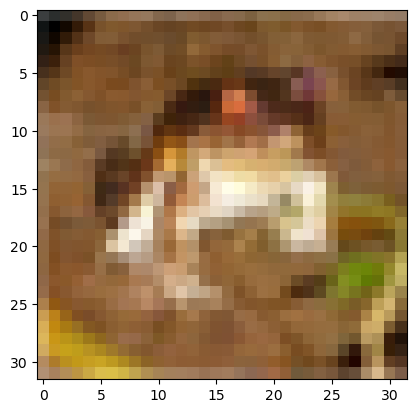

In [6]:
index = 0
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

**Create a model**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, input_dim=4, activation='relu'),
    Dense(10)
])

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam', metrics = ['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5163 - accuracy: 0.4494 - val_loss: 1.3144 - val_accuracy: 0.5353
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1569 - accuracy: 0.5897 - val_loss: 1.1160 - val_accuracy: 0.5953
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0054 - accuracy: 0.6445 - val_loss: 1.0033 - val_accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9014 - accuracy: 0.6840 - val_loss: 0.9566 - val_accuracy: 0.6631
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8275 - accuracy: 0.7072 - val_loss: 0.8897 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7697 - accuracy: 0.7295 - val_loss: 0.8590 - val_accuracy: 0.7010
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7210 - accuracy: 0.7467 - val_loss: 0.8921 -

In [16]:
y_pred = model.predict(test_images)


313/313 [==============================] - 3s 8ms/step


'ship'

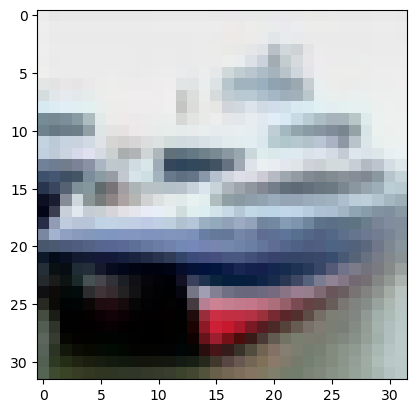

In [17]:
index = 1
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [ ]:
model.ev